# Lesson 1

What is Deep Learning?
- Deep Learning : an approach to machine learning characterized by deep stacks of computation
- Neural Networks : become the defining model of deep learning.Neural networks are composed of neurons, where each neuron individually performs only a simple computation.  
  
The Linear Unit  
- a neuron(or unit)
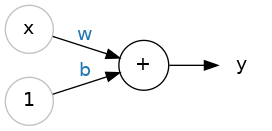  
The Linear Unit : y=wx + b  
x : input  
w : weight  
w + x reaches the neuron. A neuron network "learns" by modifying its weights.  
b : a special kind of weight we call bias. The bias enables the neuron to modify the output independently of its inputs.  
y : the value th neuron ultimately outputs. This neuron's activation is y = w*x+b, or as a formula y=wx+b.  
  
Example - The Linear Unit as a Model
- Single neuron models are linear models.
-Let's think how this might work on a dataset like 80 Cereals. Training a model with 'sugars'(grams of suger per serving) as input and 'calories'(calories per serving) as output, we might find the bias is b = 90 and the weight is 2 = 2.5. We could estimate the calorie content of a cereal with 5 grams of sugar per serving like this:  
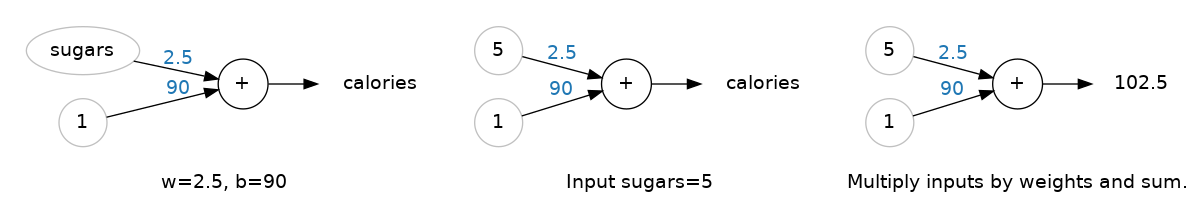
 And, checking against our formula, we have calories = 2.5 * 5 + 90 = 102.5, just like we expect.  
   
Multiple Inputs  
- To find the output, we would multiply each input to its connection weight and then add them all together.
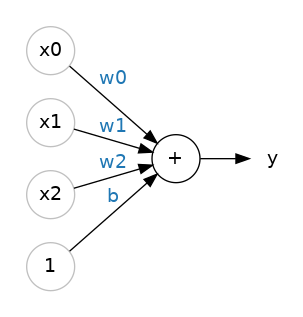
- The formula for this neuron would be  
 y = w0x0 + w1x1 + w2x2 +b
- A linear unit with two inputs will fit a plane, and a unit with more inputs than will fit a hyperplane.  


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

#Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape = [3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Lesson 2

Deep Neural Networks  
  
Layers
- Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.
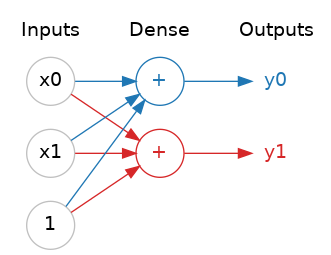  
A dense layer of two linear units receiving two inputs and a bias.  
- In a well-trained neural network, each layer is a transformation getting us a little bit closer to solution.  
  
 The Activation Function
- Two dense layers with nothing in between are no better than a single dense layer by itself. What we need is something nonlinear. What we need are activation functions.  
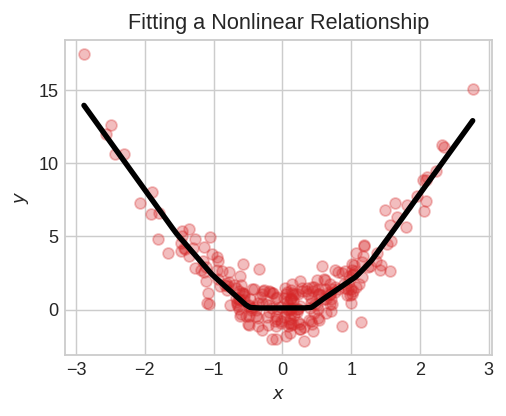  
Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activqtion functions.
- Activation function : simply some function we apply to each of a layer's outputs(its activations). The most common os the rectifier function max(0,x).
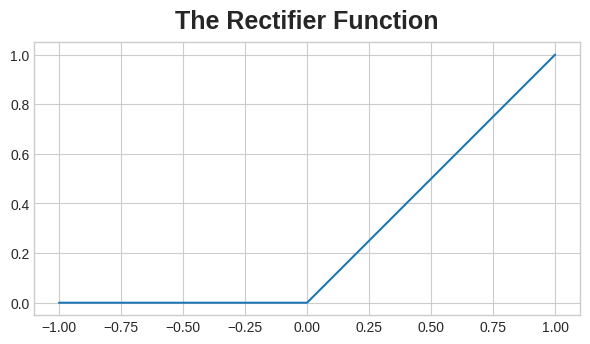
- The recifier function has a graph that's a line with the negative part "recified' to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.
- rectified linear unit or ReLU : when we attach the rectifier to linear unit
- Applying a ReLU activation to a linear unit means the output becomes max(0, w * x +b), which we might draw in a diagram like:
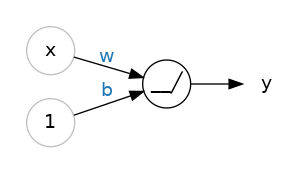  
  
Sracking Dense Layers
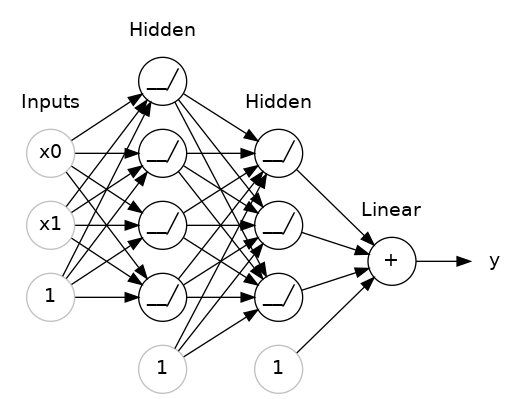
- The layers before the output layer are sometimes called hidden since we naver see their outputs directily.
- The final (output) layer is a linear unit (meaning, no activation functon).

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequenctial([
    # the hidden ReLU layers
    layers.Dense(units=4, activation = 'relu', input_shape=[2]),
    layers.Dense(units=3, activation = 'relu'),
    #the linear output layer
    layers.Dense(units=1),
])

AttributeError: module 'tensorflow.keras' has no attribute 'Sequenctial'

# Lesson 3

Stochastic Gradient Descent  
  
The Loss Function
- loss function : measures the disparity between the target's true value and the value the model predicts
- regression : where the task is to predict some numerical value
- A common loss function for regression problems is the mean absoulte error or MAE.
- For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred)
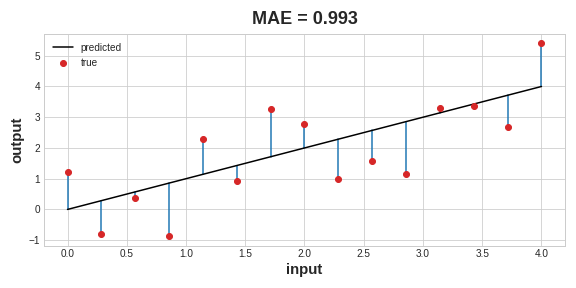  
 The mean absolute error is the average length between the fitted curve and the data points.  
   
The Optimizer - Stochastic Gradient Descent
- Optimizer : and algorithml that adjusts the weights to minimize the loss.
- Stochastic gradient descent :  
 1. Sample some training data and run it through the network to make predictions.
 2. Measure the loss between the predictions and the true values.
 3. Finally, adjust the weights in a direction that makes the loss smaller.
 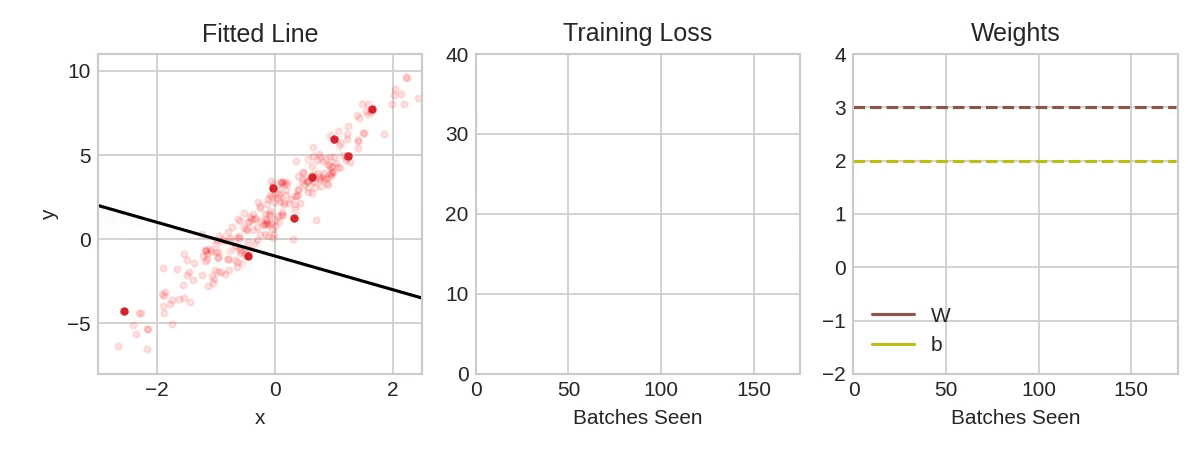
- minibatch : each iteration's sample of training data
- epoch : a complete round of the training data
- The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new batch, it will shift the weights(w the slope and b the y-intercept)toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.
- learning rate : the line only makes a small shift in the direction of each batch. the size of these shifts
- Adam : an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning
- gradient : a vector that tells us in what direction the weights need to go
- Stochastic : determined by chance

In [7]:
# Adding the Loss and Optimizer

model.compile(
    optimizer="adam",
    loss="mae",
)

In [8]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

#Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

FileNotFoundError: [Errno 2] No such file or directory: '../input/dl-course-data/red-wine.csv'

In [9]:
print(X_train.shape)

NameError: name 'X_train' is not defined

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape=[11]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1)
])

In [11]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

NameError: name 'X_train' is not defined

In [13]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

NameError: name 'history' is not defined

# Lesson 4

Interpreting the Learning Curves  
- the signal is the part that generalizes, the part that can help our model make predictions from new data.
- the noise is that part that is only true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions.
- learning curves : when we train a model we've been plotting the loss on the training set epoch by epoch. To this we'll add a plot the validation data too.
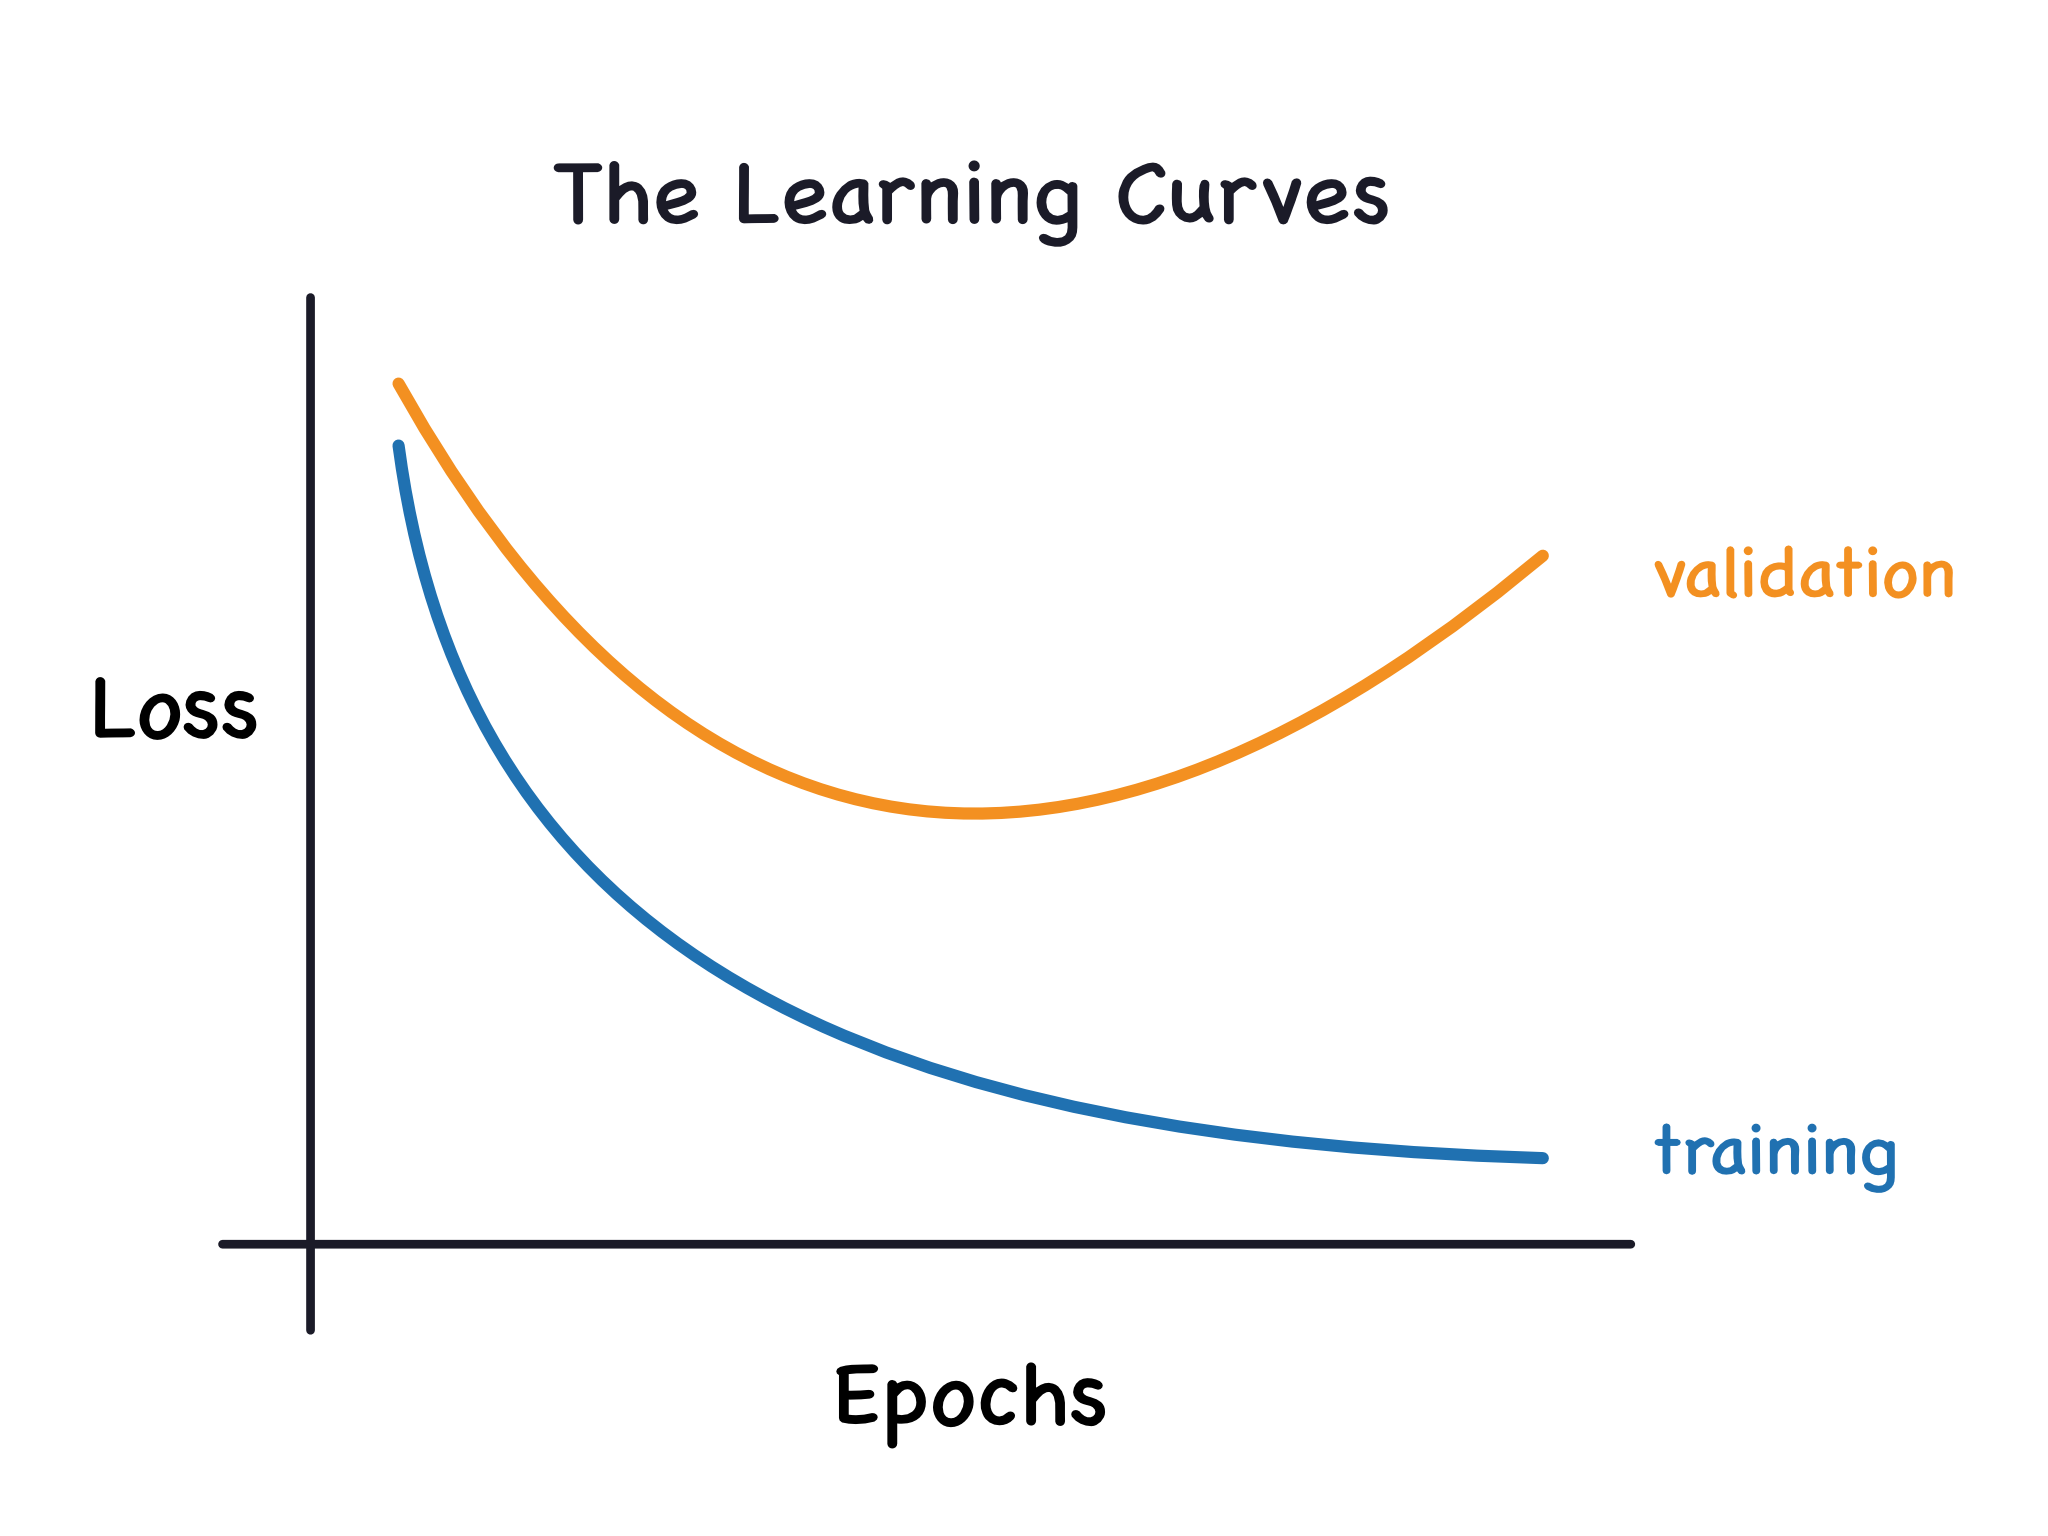
- when a model learns signal both curves go down, but when it learns noise a gap is created in the curves. The size of the gap tells you how much noise the model has learned.
-So long as the trade is in our favor, the validation loss will continue to decrease. After certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.
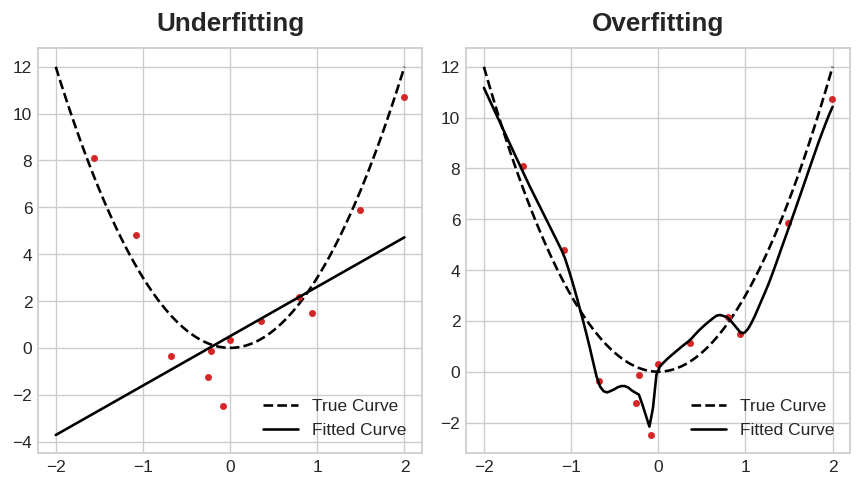
- underfitting : the training set is when the loss is not as low as it could be because the model hasn't learned enough signal.
- overfitting : the training set is when the loss is not as low as it could be because the model learned too mush noise.
- capacity : A model's capacity refers to the size and complexity of the patterns it is able to learn.
- Early stopping : we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the traing this way
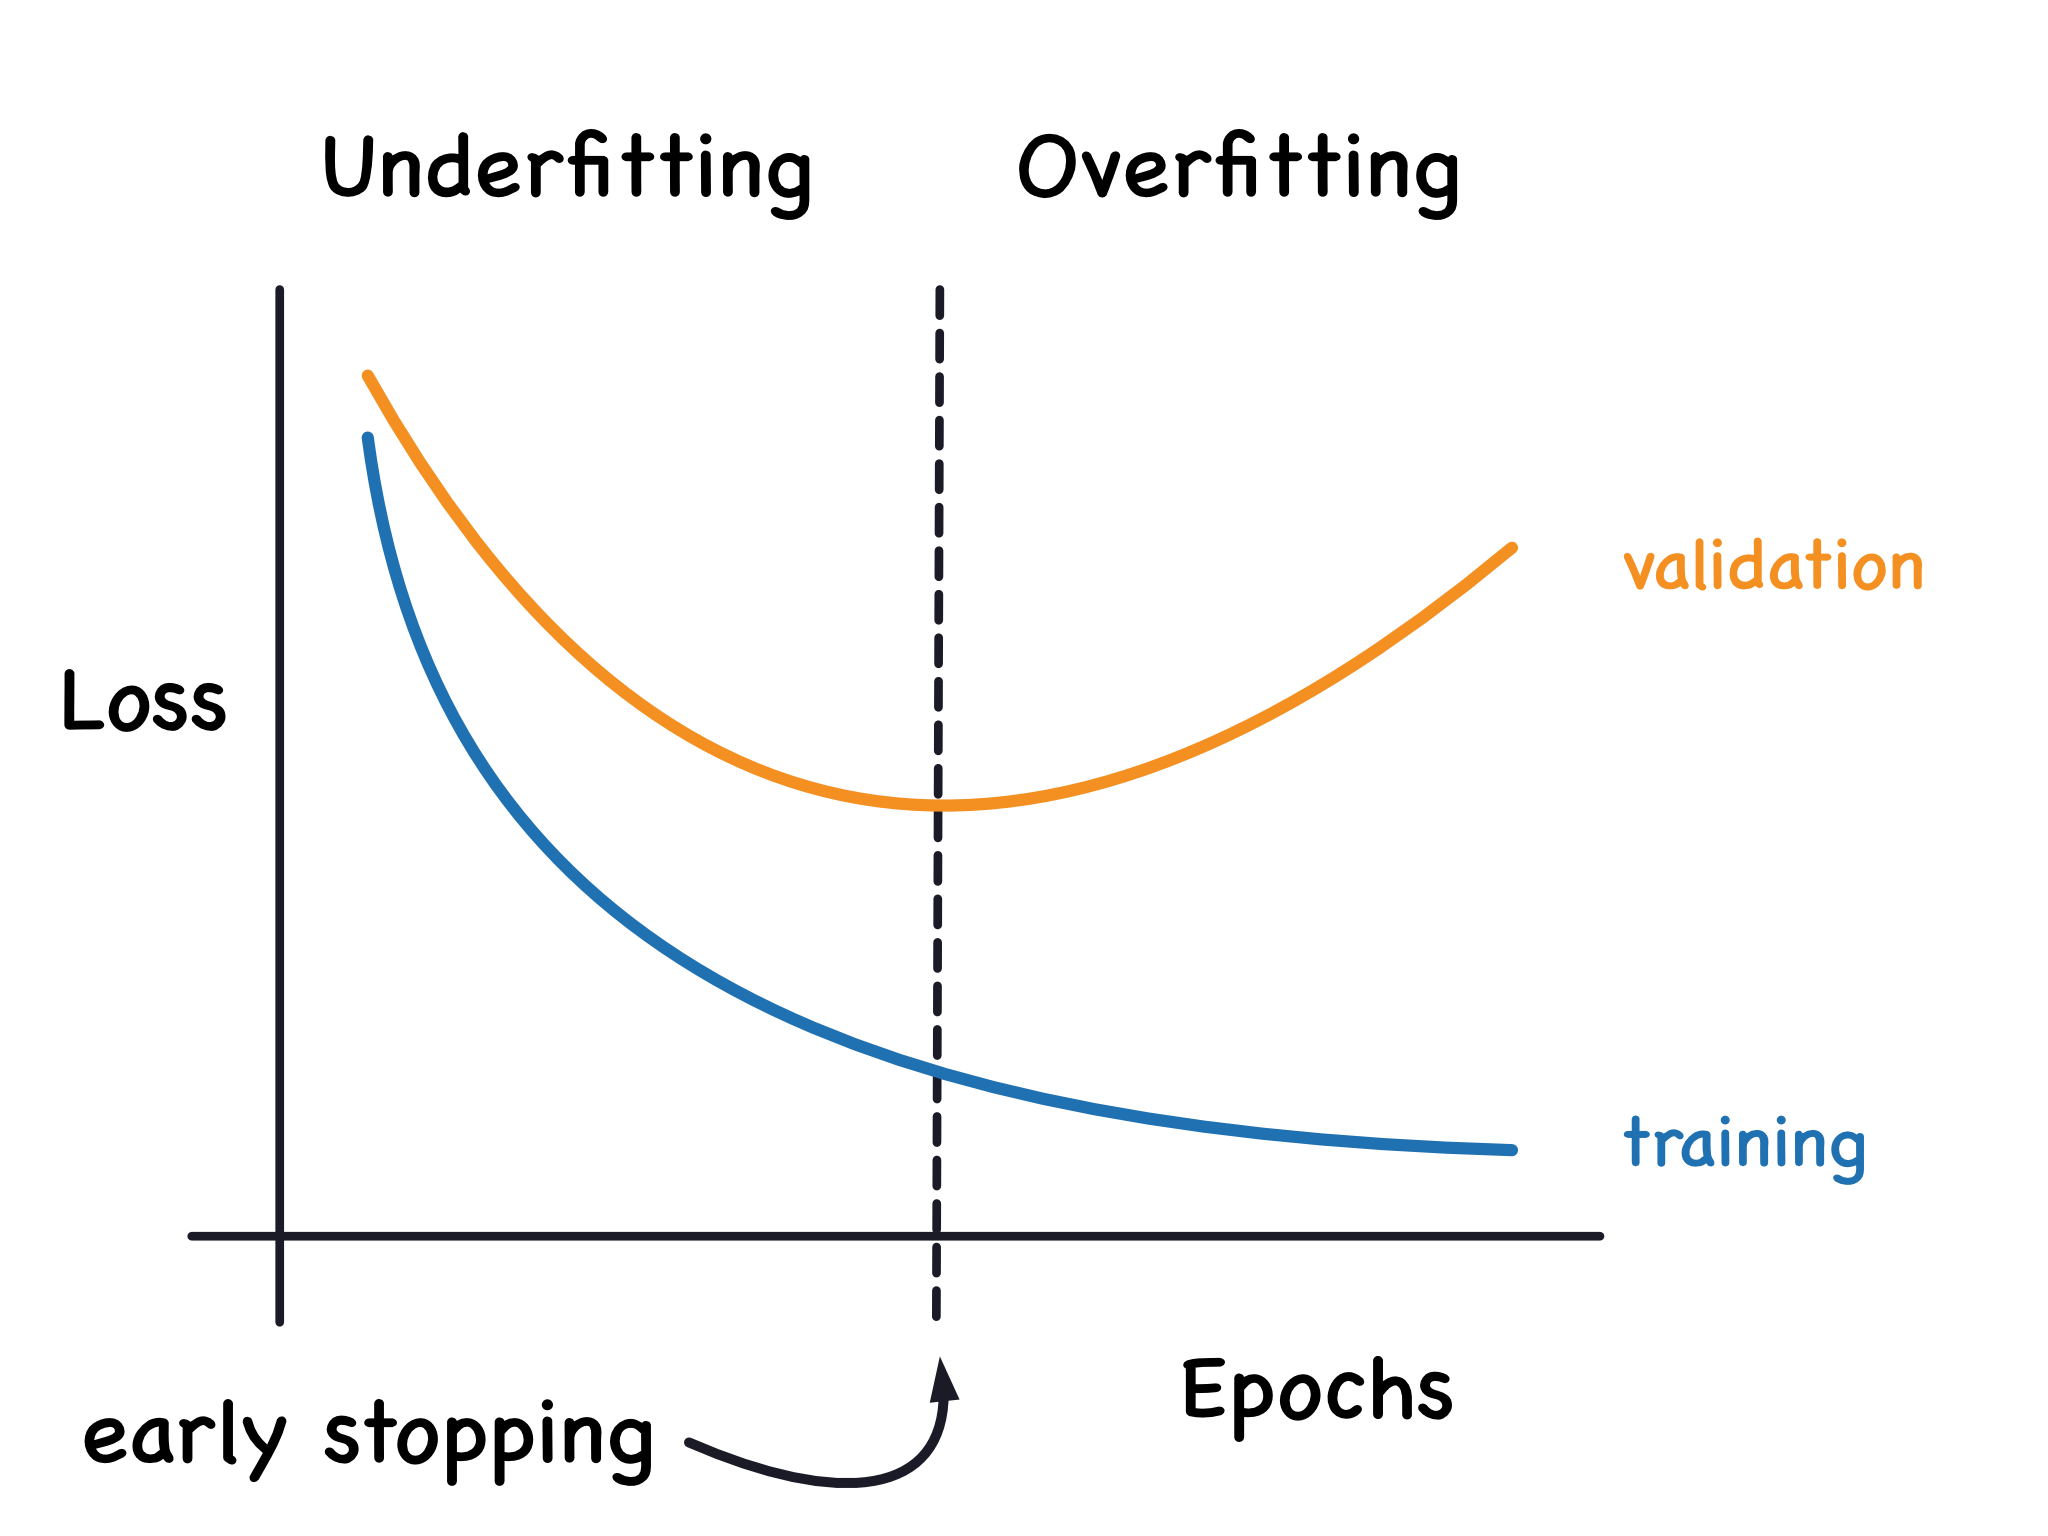

In [14]:
#capacity
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider=keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

depper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [16]:
#adding early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)

In [17]:
# train a Model with early stopping

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../input/dl-course-data-red-wine.csv')

#create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max _- min_)
df_valid = (df_valid - min_) / (max_ - min_)

#split features and target
X_train = df_train.drop('quality',axis=1)
X_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-17-4aebae856662>, line 16)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, #minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([minlayers.Dense(512, activation='relu', input_shape=[11]),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(1),
                          ])
model.compile(
    optimizer='adam',
    loss='mae',
)

NameError: name 'minlayers' is not defined

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], #put your callbacks in a list
    verbose=0, #turn off traing log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

NameError: name 'X_train' is not defined

# Lesson 5

Dropout Layer:

- Dropout helps to prevent overfitting by randomly "dropping out" a portion of neurons (input units) during training.
- This breaks the reliance on specific combinations of weights, forcing the network to learn more general and robust patterns.
- Dropout can be seen as creating an ensemble of smaller networks, making predictions more reliable, similar to random forests.
- In Keras, the dropout rate defines the percentage of units to drop, e.g., layers.
 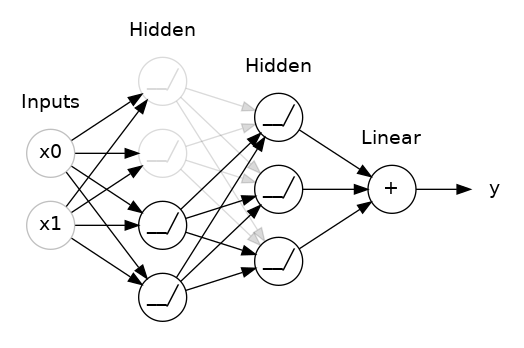
- Dropout(rate=0.3) applies 30% dropout.

  Batch Normalization (Batchnorm):
  
- Batch normalization helps with training speed and stability.
- Normalizes each batch’s input using its mean and standard deviation, followed by a rescaling with trainable parameters.
- This process keeps the data on a balanced scale, improving training efficiency and potentially solving training issues.
- Adding batch normalization to models often reduces the number of epochs required for training.

In [ ]:
#adding dropout

keras.Sequential([
    layers.Dropout(rate=0.3), #apply 30% dropout to the next layer
    layers.Dense(16)
])

In [ ]:
#adding batch normalization
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
#or between a layer and its activation function
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

In [ ]:
#using dropout and batch normalization
import matplotlib.pyplot as plt

plt.style.use('seaborn-whithegrid')
#Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes',labelweight='bold', labelsize='large',
       titleweight='bold',titlesize=18, titlepad=10
)

import pandas as pd
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

#create traing and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [ ]:
model.complie(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

#show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();

# Lesson 6

Binary Classification:

- Definition: Binary classification is the task of predicting one of two possible classes, such as "Yes/No" or "Cat/Dog". In machine learning, these classes are converted to numeric labels (0 and 1).
- Examples: Predicting whether a customer will make a purchase, detecting fraudulent transactions, or identifying signals from space.  
  
Accuracy and Cross-Entropy:

- Accuracy: It’s a metric that measures the ratio of correct predictions to total predictions. It works well when the classes are balanced but can't be used as a loss function.
- Cross-Entropy: Used as a loss function for classification tasks, cross-entropy measures the "distance" between predicted and actual probabilities. Minimizing cross-entropy improves the model’s probability predictions, which in turn improves accuracy.  
  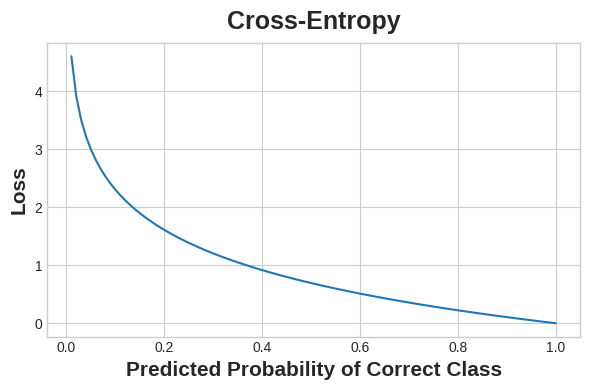  
    
Sigmoid Function:
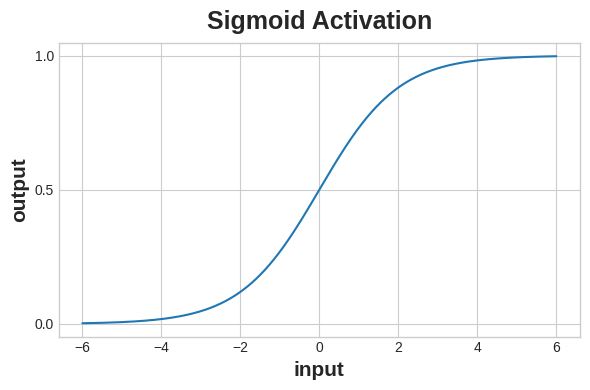
  
- Purpose: Converts the real-valued outputs from a neural network into probabilities between 0 and 1.
- Graph Shape: It forms an "S" curve between 0 and 1, making it ideal for binary classification.
- Threshold: Typically, a threshold of 0.5 is used—if the output is less than 0.5, the predicted class is 0, otherwise it's 1.
- Example:

The Ionosphere dataset is used to determine if radar signals indicate the presence of an object in the ionosphere, a typical binary classification problem.

In [21]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('../input/dl-course-data/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

FileNotFoundError: [Errno 2] No such file or directory: '../input/dl-course-data/ion.csv'

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

NameError: name 'X_train' is not defined

In [25]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

NameError: name 'history' is not defined